<a href="https://colab.research.google.com/github/DANILYCHAN/collab_notebooks/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22LP_fillBetween_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача линейного программирования

### Графический метод решения задач ЛП с двумя переменными

Областью решений неравенства $a_1x_1+a_2x_2\leqslant b$ 
является одна из двух полуплоскостей, на которые разбивает всю координатную плоскость прямая $a_1x_1+a_2x_2 = b$, соответствующая этому неравенству.

Чтобы определить, какая из двух полуплоскостей является областью решений, выбираем произвольную точку, не лежащую на прямой (например, (0;0)). Если неравенство выполняется, то область, содержащая точку, является областью решений.

Линией уровня целевой функции $c_1x_1+c_2x_2$ называется прямая, в точках которой функция постоянна. Значения целевой функции увеличиваются, если её линии уровня перемещать в направлении их нормали $(c_1, c_2)$.

## Линейное программирование с Python
 
### Реализация графического метода

Рассмотрим задачу линейного программирования:
 
найти максимальное значение целевой функции $F=4x+3y$ при следующих ограничениях
 
 $$
 \left\{
 \begin{array}{l}
 x+2y\leqslant 25\\
 2x-4y\leqslant 8\\
 2x-y\geqslant 5\\
 x\geqslant 0, y\geqslant 2\\
 \end{array}
 \right.
  $$
 
 
 
 Преобразуем ограничения:
 
  $$
 \left\{
 \begin{array}{l}
 y\leqslant \dfrac{25-x}{2}\\
 y\geqslant \dfrac{2x-8}{4}\\
 y\leqslant 2x-5\\
 x\geqslant 0, y\geqslant 2\\
 \end{array}
 \right.
  $$
 
 
 
 Начнем с построения графического изображения задачи.
 
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

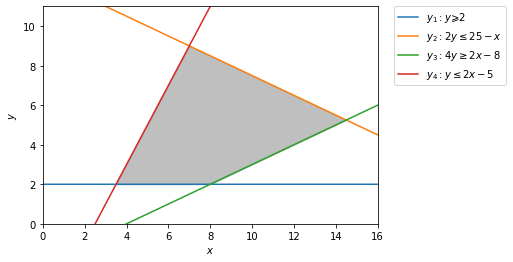

In [ ]:


# Строим прямые линии

# Задаем диапазон изменения переменной x
# x > 0
x = np.linspace(0, 20, 2000)

# y >= 2
y1 = (x*0) + 2

# 2y <= 25 - x
y2 = (25-x)/2

# 4y >= 2x - 8 
y3 =  (2*x-8)/4

# y <= 2x - 5 
y4 =  2 * x -5

# Строим графики

plt.plot(x, y1, label=r'$y_1: y\geqslant2$')
plt.plot(x, y2, label=r'$y_2: 2y\leq25-x$')
plt.plot(x, y3, label=r'$y_3: 4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y_4: y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Закрашиваем область допустимых планов

y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)

plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 Наше решение находится где-то в серой области, на рисунке выше.

Доказано, что минимумы и максимумы задач линейного программирования лежат в вершинах допустимой области. В этом примере для нашего практически возможного региона есть только 4 угла, поэтому мы можем найти решения для каждой вершины, чтобы среди них найти наш максимум.

Четыре угла получаются при пересечении следующих линий:

1)$y⩾2$ и $y⩽2x−5$ (синяя и красная линии);

2)$2y⩽25−x$ и $y⩽2x−5$ (красная и оранжевая); 

3)$2y⩽25−x$ и $4y⩾2x−8$ (оранжевая и зеленая);

4) $y\geqslant2$ и $4y\geqslant 2x−8$ (синяя и зеленая линии).

Найдем координаты точек пересечения прямых и вычислим $F=4x+3y$ для каждого угла.



Для этого воспользуемся библиотекой sympy.

In [ ]:
import sympy as sp
sp.init_printing()

Для корректной работы с символьными переменными нужно объявлять их с помощью метода symbols или var (последний вариант удобнее).

In [ ]:
# 1

#x, y = sp.symbols('x, y')
sp.var('x y F')
F = 4 * x + 3 * y

y1 = 2

# y <= 2x - 5 
y4 =  2 * x -5

y1,y4


Уравнение записывается как функция Eq с двумя параметрами. Функция solve возврящает список решений.

In [ ]:
sp.solve(sp.Eq(y1,y4),x)


$x = \frac 7 2$, $y = 2$, $F = (4 \cdot \frac72 + 3 \cdot 2) = 20$

Функция subs заменяет переменную на выражение. Она может заменить несколько переменных. 

In [ ]:
F.subs([(x,7/2),(y,2)])

In [ ]:
y2 = (25 - x)/2

sp.solve(sp.Eq(y2, y4), x)

$x = 7$, $y = 9$, $F = (4 \cdot 7 + 3 \cdot 9) = 55$

In [ ]:
F.subs([(x, 7), (y, 9)])

In [ ]:
y3 = (2*x - 8)/4

sp.solve(sp.Eq(y2, y3), x)

$x = 29 / 2$, $y = 5,25$, $F = ?$

In [ ]:
F.subs([(x, 29/2), (y, 5.25)])

In [ ]:
sp.solve(sp.Eq(y1, y3), x)

In [ ]:
F.subs([(x, 8), (y, 2)])

Fmax = 73,75

##### Задание
Найдите координаты остальных вершин, вычислите в них значение целевой функции и укажите в какой из них достигается ее максимум.


#####  Ответ

Максимальное значение для $F$ равно 73.75, когда $x$ равно 14.5, а $y$ равно 5.25.

Этот метод проверки каждой вершины возможен только при небольшом числе переменных и ограничений. По мере увеличения числа ограничений и переменных становится сложнее рассчитать эти проблемы и обработать все вершины.
Например, если была бы третья переменная в целевой функции $F = Ax + By + Cz$ нам понадобится график в трех измерениях ($x$, $y$ и $z$).

